# Ejercicio de Data Science y Linear Regression con Pandas
Para el siguiente ejercicio de Data Science y Linear Regression con Pandas utilizaremos la información disponible en [kaggle](https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data), la cual contiene los siguientes campos:
* GlobalTemperatures.csv
        dt: 
        LandAverageTemperaturUncertainty : 
        LandMaxTemperature : 
        LandMaxTemperatureUncertainty :
        LandMinTemperature :
        LandMinTemperatureUncertainty :
        LandAndOceanAverageTemperature :
        LandAndOceanAverageTemperatureUncertainty :
* GlobalLandTemperaturesByCity.csv
        dt:
        AverageTemperature : 
        AverageTemperatureUncertainty : 
        City : 
        Country : 
        Latitude :
        Longitude : 


## Explorar la informacion

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use('ggplot')

In [2]:
# Leer la informacion
data = pd.read_csv('../data/GlobalTemperatures.csv')

# Mostrar los 5 primeros registros
data.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
"""
Para el primer analisis solo tomaremos como referencia el campo de informacion: LandAverageTemperature
"""
data = data[['dt','LandAverageTemperature']]
data.head()

,dt,LandAverageTemperature
0,1750-01-01,3.034
1,1750-02-01,3.083
2,1750-03-01,5.626
3,1750-04-01,8.490
4,1750-05-01,11.573


In [4]:
data.describe()

,LandAverageTemperature
count,3180.000000
mean,8.374731
std,4.381310
min,-2.080000
25%,4.312000
50%,8.610500
75%,12.548250
max,19.021000


Podemos visualizar que la temperatura minima es **`-2.08`** y la maxima **`19.02`**

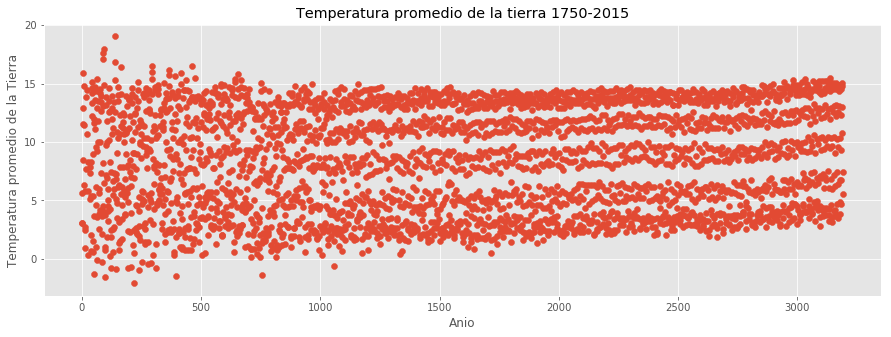

In [5]:
"""
Generemos una grafica de puntos, modificando el ancho y largo 
de la grafica para poder tener una mejor visualizacion de la informacion
"""
plt.figure(figsize = (15, 5))
plt.scatter(x = data['LandAverageTemperature'].index, y = data['LandAverageTemperature'])
plt.title("Temperatura promedio de la tierra 1750-2015")
plt.xlabel("Anio")
plt.ylabel("Temperatura promedio de la Tierra")
plt.show()

In [6]:
# Vamos a probar solo graficar los anios
# Verifiquemos el tipo de dato de la columna dt
print(type(data['dt'][0]))

<class 'str'>


In [7]:
# Vamos a convertir la columna a un objeto tiempo
times = pd.DatetimeIndex(data['dt'])

# Agrupamos la informacion por anios
grouped = data.groupby([times.year]).mean()

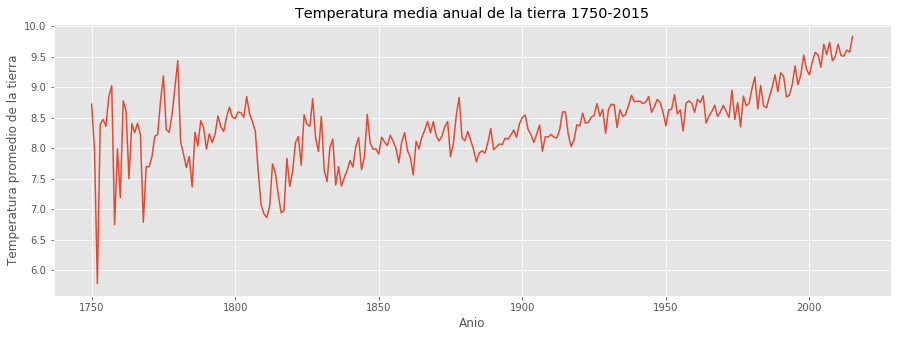

In [8]:
# graficamos
plt.figure(figsize = (15, 5))
plt.plot(grouped['LandAverageTemperature'])

# Change features of the graph
plt.title("Temperatura media anual de la tierra 1750-2015")
plt.xlabel("Anio")
plt.ylabel("Temperatura promedio de la tierra")
plt.show()

In [9]:
# Que puede ocurrir en los primeros anios?
grouped.head()

,LandAverageTemperature
dt,
1750,8.719364
1751,7.976143
1752,5.779833
1753,8.388083
1754,8.469333


In [10]:
# Vamos a checar que es lo que pasa en 1752
data[times.year == 1752]

,dt,LandAverageTemperature
24,1752-01-01,0.348
25,1752-02-01,NaN
26,1752-03-01,5.806
27,1752-04-01,8.265
28,1752-05-01,NaN
29,1752-06-01,NaN
30,1752-07-01,NaN
31,1752-08-01,NaN
32,1752-09-01,NaN
33,1752-10-01,7.839


In [11]:
# Tenemos demasiada informacion nula
data[np.isnan(data['LandAverageTemperature'])]

,dt,LandAverageTemperature
10,1750-11-01,NaN
16,1751-05-01,NaN
18,1751-07-01,NaN
21,1751-10-01,NaN
22,1751-11-01,NaN
23,1751-12-01,NaN
25,1752-02-01,NaN
28,1752-05-01,NaN
29,1752-06-01,NaN
30,1752-07-01,NaN


In [12]:
# Usaremos el valor previo validado para llenar las observaciones nulas
data['LandAverageTemperature'] = data['LandAverageTemperature'].fillna(method='ffill')

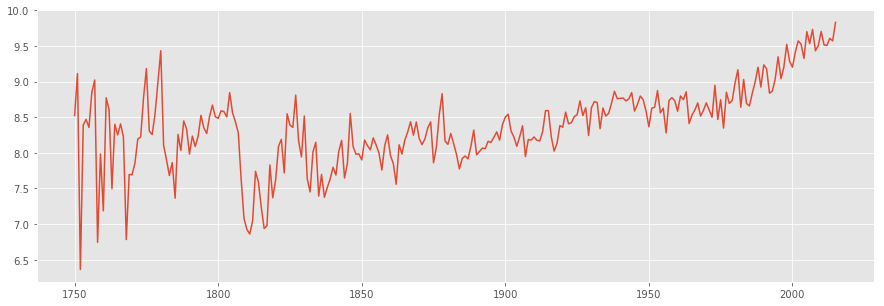

In [13]:
# Reagrupamos la informacion y graficamos
grouped = data.groupby([times.year]).mean()

# La grafica se ve mejor, aunque no es perfecta
plt.figure(figsize = (15, 5))
plt.plot(grouped['LandAverageTemperature'])
plt.show()

## Modelado de datos

In [14]:
# Para modelar los datos, vamos a necesitar de la libreria sklearn
from sklearn.linear_model import LinearRegression as LinReg

In [15]:
x = grouped.index.values.reshape(-1, 1)
y = grouped['LandAverageTemperature'].values

In [16]:
reg = LinReg()
reg.fit(x, y)
y_preds = reg.predict(x)
print("Certeza: " + str(reg.score(x, y)))

Certeza: 0.376683227531


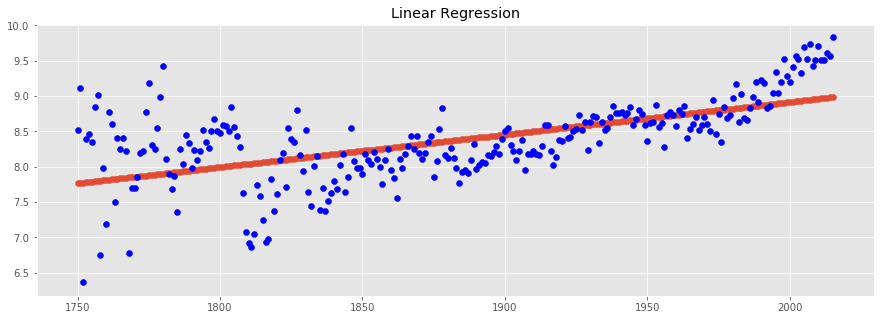

In [17]:
plt.figure(figsize = (15, 5))
plt.title("Linear Regression")
plt.scatter(x = x, y = y_preds)
plt.scatter(x = x, y = y, c = "b")

In [18]:
reg.predict(2050)

array([ 9.14631486])

## Temperatura por ciudad (Aguascalientes)

In [19]:
# Leer la informacion
data = pd.read_csv('../data/GlobalLandTemperaturesByCity.csv')
data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [20]:
# Cuantas ciudades estan disponibles
data['City'].nunique()

3448

In [21]:
# Verificamos que nuestra ciudad de interes este disponible
ciudades = np.array(data['City'])
"Aguascalientes" in ciudades

True

In [22]:
# Filtramos la informacion para la ciudad de interes
data = data.loc[data['City'] == 'Aguascalientes']

In [23]:
# clasificamos la informacion
data = data[['dt','AverageTemperature','City']]

In [24]:
data.head()

,dt,AverageTemperature,City
104933,1835-01-01,14.198,Aguascalientes
104934,1835-02-01,13.505,Aguascalientes
104935,1835-03-01,15.158,Aguascalientes
104936,1835-04-01,18.503,Aguascalientes
104937,1835-05-01,20.349,Aguascalientes


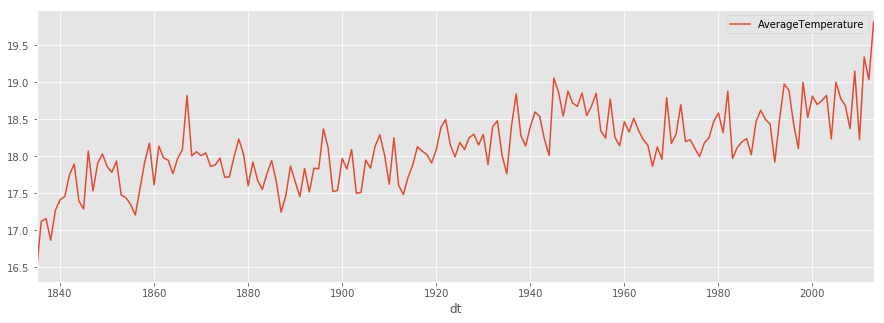

In [25]:
# Vamos a convertir la columna dt a un objeto tiempo
times = pd.DatetimeIndex(data['dt'])

# Agrupamos la informacion por anios
grouped = data.groupby([times.year]).mean().plot.line(figsize=(15,5))

## Modelado de datos

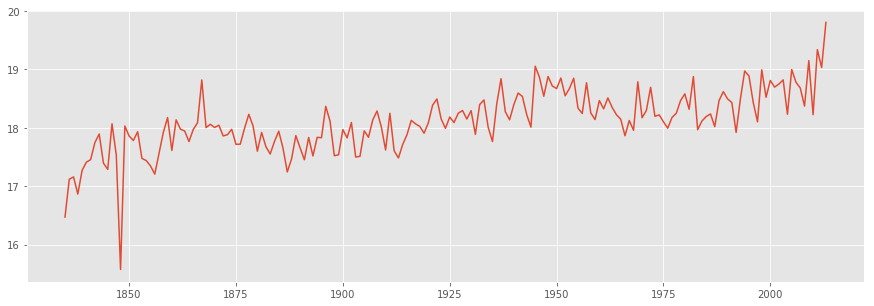

In [26]:
# Usaremos el valor previo validado para llenar las observaciones nulas
data['AverageTemperature'] = data['AverageTemperature'].fillna(method='ffill')

# Reagrupamos la informacion y graficamos
grouped = data.groupby([times.year]).mean()

# La grafica se ve mejor, aunque no es perfecta
plt.figure(figsize = (15, 5))
plt.plot(grouped['AverageTemperature'])
plt.show()

x = grouped.index.values.reshape(-1, 1)
y = grouped['AverageTemperature'].values

In [27]:
reg = LinReg()
reg.fit(x, y)
y_preds = reg.predict(x)
print("Certeza: " + str(reg.score(x, y)))

Certeza: 0.512850885474


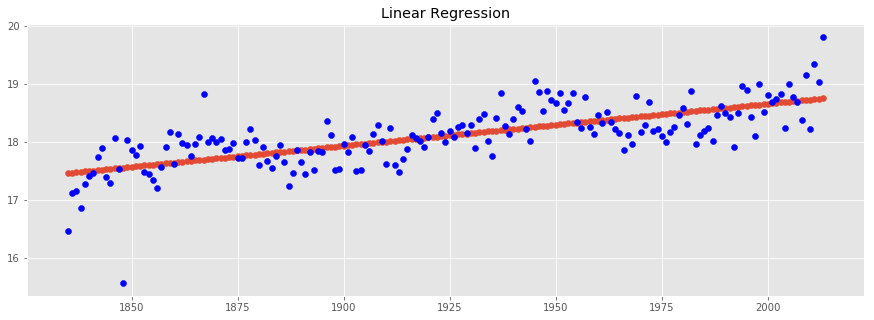

In [28]:
plt.figure(figsize = (15, 5))
plt.title("Linear Regression")
plt.scatter(x = x, y = y_preds)
plt.scatter(x = x, y = y, c = "b")

**Vamos a pedecir la temperatura promedio para el 2018**

In [29]:
reg.predict(2018)

array([ 18.78990913])

**Vamos a pedecir la temperatura promedio para el 2050**

In [30]:
reg.predict(2050)

array([ 19.02170101])